In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn
from matplotlib import pyplot as plt

#df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)
df = pd.read_csv('food.csv')
#df.to_csv('food.csv')
df.columns = df.columns.str.replace('-','_')

C:\Users\misso\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,8,10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


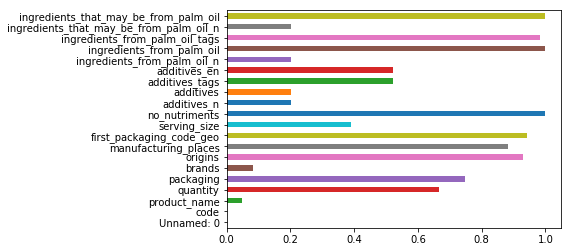

In [3]:
#df[df.energy_100g < 200][['product_name', 'generic_name', 'main_category', 'energy_100g']][:50]

df.isnull().mean(axis=0)[:20].plot(kind = 'barh')

In [4]:
def del_nulls(data, columns=None):
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

def split_row(df, column, sep):
    indexes = list()
    new_values = list()
    for i, raw_column in enumerate(df[column].astype(str)):
        values = raw_column.split(sep) #splitting values by separator
        for value in values: #writing new values and theit indexes in list
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy() #creating new dataframe with splitted values
    new_df[column] = new_values
    return new_df


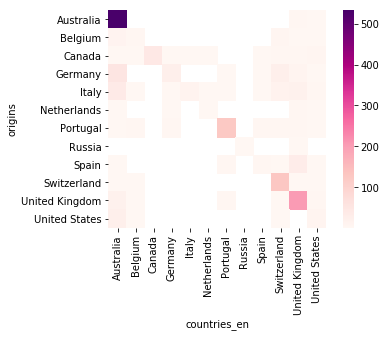

In [71]:
popCountries = df["countries_en"].value_counts()[:15].index.tolist()
popCountries.remove('France')

dfCountries = split_row(del_nulls(df, ["countries_en", "origins"]), "countries_en", ",")
dfCountries = split_row(dfCountries, "origins", ",")[['code','origins', 'countries_en']]
dfCountries = dfCountries[dfCountries.countries_en.isin(popCountries) & dfCountries.origins.isin(popCountries)]

pivt = dfCountries.pivot_table(values='code', index='origins', columns='countries_en', aggfunc='count')
seaborn.heatmap(pivt, square=True, cmap="RdPu")



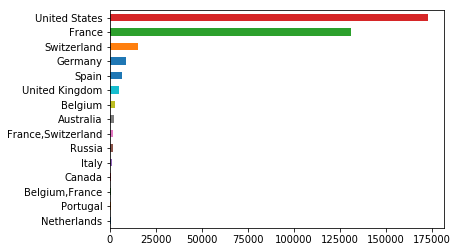

In [32]:
countries_en = split_row(del_nulls(df, ["countries_en"]), "origins", ",")
countries_en["countries_en"].value_counts()[:15][::-1].plot(kind = 'barh')

In [67]:
columndietfood = ['product_name', 'trans_fat_100g', 'sugars_100g', 'energy_100g', 'fat_100g']
food = del_nulls(df, columndietfood)[columndietfood]
dietfood = food[(food.energy_100g < 150) & (food.trans_fat_100g == 0) & (food.sugars_100g == 0) & (food.fat_100g < 5)]
dietfood.sort_values(['energy_100g', 'fat_100g'], ascending=False)[:15]

,product_name,trans_fat_100g,sugars_100g,energy_100g,fat_100g
152404,Unsweetened Full Shot Cold Brew Coffee,0.0,0.0,146.0,2.26
87715,Radish Sprout Blend,0.0,0.0,146.0,1.76
96210,Low Fat Organic Poultry Gravy,0.0,0.0,146.0,1.75
92787,Sliced Bamboo Shoots,0.0,0.0,146.0,1.74
150680,Salmon Portions,0.0,0.0,146.0,0.66
167302,Forbidden Horchata,0.0,0.0,146.0,0.66
13953,"Fullei Fresh, Organic Alfalfa/Clover Sprouts",0.0,0.0,146.0,0.59
13954,"Fullei Fresh, Organic Clover Sprouts",0.0,0.0,146.0,0.59
122071,Cut Spinach,0.0,0.0,146.0,0.59
8079,Leaf Spinach,0.0,0.0,146.0,0.43
